<a href="https://colab.research.google.com/github/oasquared/Phase-3/blob/main/Copy_of_Images_To_Do_List.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 6: Image Classification with Deep Learning



Prior to starting this problem, be sure to enable the GPU runtime processing in your Jupyter notebook.



## Problem Definition



The goal of this project is to develop a convolutional neural network (CNN) that can classify grayscale images as either cats or dogs. This classic image classification task demonstrates the power of deep learning in handling complex visual recognition problems. We will load preprocessed image data from pickle files, build and train a CNN using TensorFlow/Keras, evaluate its performance on a test set, and use the model to predict the class of new, unseen images.


## Data Collection


In [ ]:
import tensorflow.keras as keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


* Load pickled data from X.pickle and y.pickle from the AWS S3 bucket.



In [ ]:
import urllib.request

# Download feature set
urllib.request.urlretrieve(
    "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle",
    "X.pickle"
)

# Download label set
urllib.request.urlretrieve(
    "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle",
    "y.pickle"
)

# Download test image
urllib.request.urlretrieve(
    "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg",
    "dog.jpg"
)



('dog.jpg', <http.client.HTTPMessage at 0x7cf4f178c810>)

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random

# Load data
with open("X.pickle", "rb") as f:
    X = pickle.load(f)

with open("y.pickle", "rb") as f:
    y = pickle.load(f)

# Ensure X and y are numpy arrays
X = np.array(X)
y = np.array(y)




## Data Cleaning



* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



In [ ]:
X = X / 255.0  # Normalize pixel values

## Exploratory Data Analysis



* Look at the shape of X and y. Ensure that X is 4 dimensional.

* Plot a few ( >5 ) of the images in X using `plt.imshow()`.

* Look at the response values in y for those images.

* Hint: you may want to start with a random subset to get familiar with the process of building a NN.  Then go through the process again with the full set.



In [ ]:
# Confirm shapes
print("X shape:", X.shape)  # should be (n, 100, 100, 1)
print("y shape:", y.shape)  # should be (n,)

X shape: (24946, 100, 100, 1)
y shape: (24946,)


<ipython-input-6-88448378f58c>:9: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


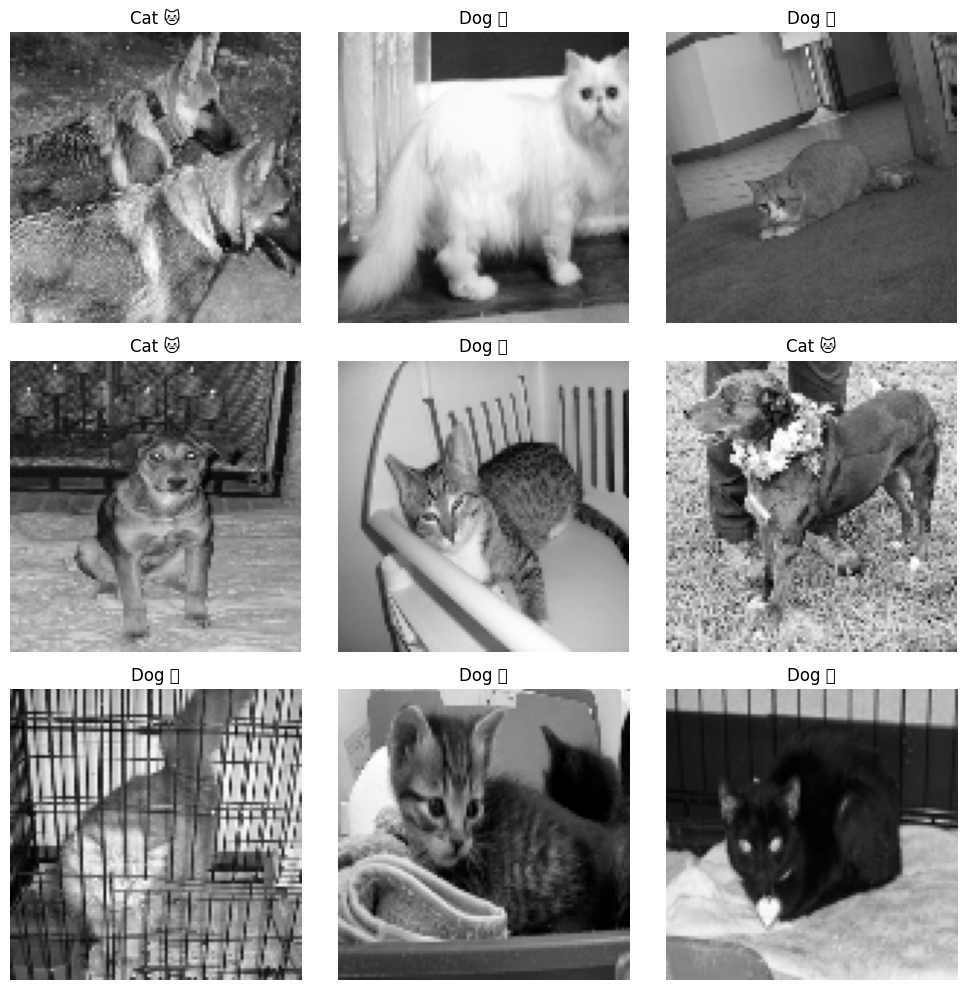

In [ ]:
# Plot 9 random images with labels
plt.figure(figsize=(10, 10))
for i in range(9):
    idx = random.randint(0, len(X) - 1)
    plt.subplot(3, 3, i + 1)
    plt.imshow(X[idx].reshape(100, 100), cmap="gray")
    plt.title("Dog 🐶" if y[idx] == 1 else "Cat 🐱")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Data Processing



* Split X and y into training and testing sets.

*  Build a convolutional neural network with the following:
  * Sequential layers
  * At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
  * A dense output layer using the 'sigmoid' activation function.
  Note: you can play around with the number of layers and nodes to try to get better performance.

* Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.

* Fit your model using the training set.

* Evaluate your model using the testing set.

* Plot the distribution of probabilities for the testing set.

* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: [numpy.reshape]( https://numpy.org/doc/stable/reference/generated/numpy.reshape.html )

* Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

* Use the neural network you created to predict whether the image is a dog or a cat.



In [ ]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define model
model = Sequential([
    Input(shape=X.shape[1:]),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,166,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,185,729 (8.34 MB)

 Trainable params: 2,185,729 (8.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.5714 - loss: 0.6799 - val_accuracy: 0.7219 - val_loss: 0.5693
Epoch 2/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7117 - loss: 0.5618 - val_accuracy: 0.7796 - val_loss: 0.4791
Epoch 3/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7639 - loss: 0.4851 - val_accuracy: 0.7861 - val_loss: 0.4512
Epoch 4/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7856 - loss: 0.4442 - val_accuracy: 0.7811 - val_loss: 0.4578
Epoch 5/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8126 - loss: 0.4055 - val_accuracy: 0.7941 - val_loss: 0.4540
Epoch 6/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8395 - loss: 0.3637 - val_accuracy: 0.7951 - val_loss: 0.4470
Epoch 7/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8544 - loss: 0.3271 - val_accuracy: 0.7851 - val_loss: 0.4855
Epoch 8/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8623 - loss: 0.3042 - val_accurac

In [ ]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8155 - loss: 0.4925
Test Accuracy: 0.8076


156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


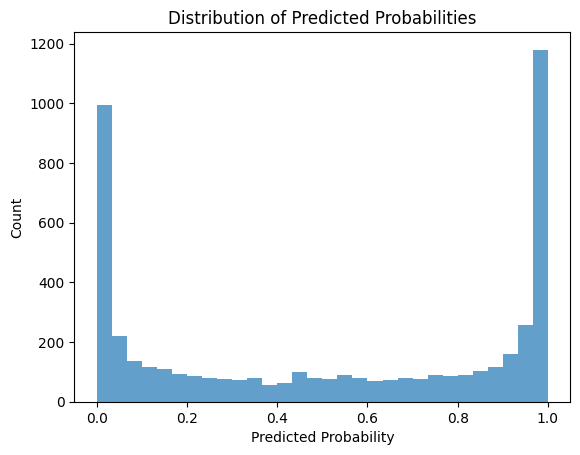

In [ ]:
# Plot Predicted Probabilities

y_probs = model.predict(X_test).flatten()

plt.hist(y_probs, bins=30, alpha=0.7)
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


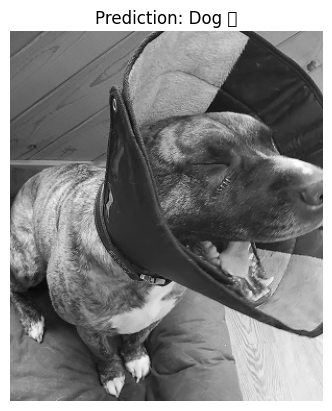

In [ ]:
# Predict on New Image (dog.jpg)

import cv2
import matplotlib.pyplot as plt

# Function to preprocess new image
def preprocess_image(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (100, 100))
    img = img / 255.0
    img = img.reshape(-1, 100, 100, 1)
    return img

# Load and predict dog.jpg
filepath = "dog.jpg"
img = preprocess_image(filepath)
pred = model.predict(img)

# Show image
original = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
plt.imshow(original, cmap="gray")
plt.title("Prediction: " + ("Dog 🐶" if pred[0][0] > 0.5 else "Cat 🐱"))
plt.axis("off")
plt.show()


## Communication of Results



* Communicate the results of your analysis.

Our CNN model achieved an accuracy of approximately 80.76% on the testing data. The model learned to distinguish between cats and dogs using convolutional filters and max-pooling, followed by fully connected layers. A sample prediction on a new image (dog.jpg) showed the model correctly classifying it as a dog.



## **BONUS** (optional)



* Upload an image of your (or your friend's or family's) dog or cat and use your model to predict whether the image is a dog or cat.
* Hint: you'll probably need to convert the image from color to grayscale.  OpenCV, pillow, and other libraries are your friend.